# Constructing simple CSG geometry

To perform a neutronics simulation the geometry of the model must be defined. The simplest way to do this is to use Constructive Solid Geometry (CSG) which involves using primitive shapes and boolean operations to create cells and void spaces.

This python notebook allows users to make a simple CSG using OpenMC and plot 2D slices of the geometry.

This first code block creates a simple spherical shell geometry by defining two spherical surfaces at different radii. The region between the two surfaces is then defined and a cell created which is added to the geometry 'universe'.

Run the cell to produce three 2D slices of the geometry in different planes.

Please look to https://docs.openmc.org/en/stable/pythonapi/base.html#building-geometry to find all the surfaces available (there are a lot!).

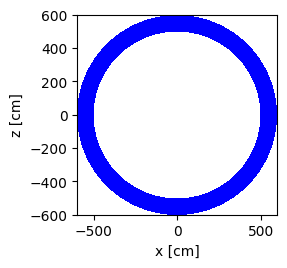

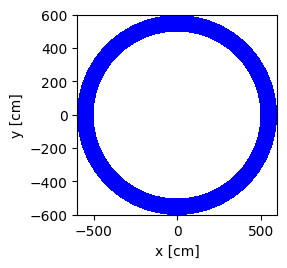

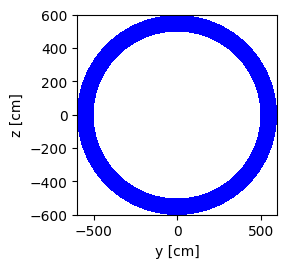

In [8]:
import openmc

# example surfaces
inner_sphere_surface = openmc.Sphere(r=500)
outer_sphere_surface = openmc.Sphere(r=600)

# above (+) inner_sphere_surface and below (-) outer_sphere_surface
blanket_region = +inner_sphere_surface & -outer_sphere_surface  

# example cell
blanket_cell = openmc.Cell(region=blanket_region)

# makes a universe to cotain all the cells
geometry = openmc.Geometry([blanket_cell])  

# shows the plots, as the geometry is symmetrical the plots look the same
color_assignment = {blanket_cell: 'blue'}

plot = geometry.plot(basis='xz', colors=color_assignment)
plot.figure.savefig('xz-cell.png')

plot = geometry.plot(basis='xy',  colors=color_assignment)
plot.figure.savefig('xy-cell.png')

plot = geometry.plot(basis='yz',  colors=color_assignment)
plot.figure.savefig('yz-cell.png')

The next code block adds a firstwall cell to the inner surface of the spherical shell.

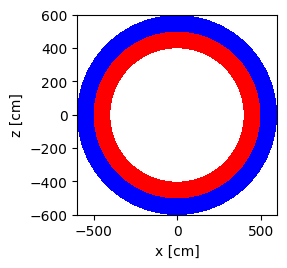

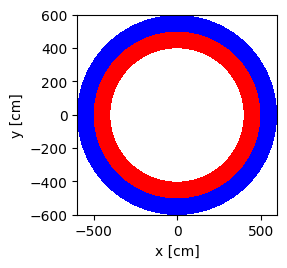

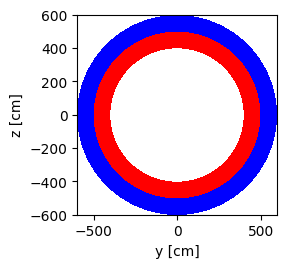

In [9]:
# example surfaces
inner_sphere_surface = openmc.Sphere(r=400)
middle_sphere_surface = openmc.Sphere(r=500) # note the extra surface
outer_sphere_surface = openmc.Sphere(r=600)

# above (+) middle_sphere_surface and below (-) outer_sphere_surface
blanket_region = +middle_sphere_surface & -outer_sphere_surface
# above (+) inner_sphere_surface and below (-) middle_sphere_surface
firstwall_region = +inner_sphere_surface & -middle_sphere_surface

# now we have two cells
blanket_cell = openmc.Cell(region=blanket_region)
firstwall_cell = openmc.Cell(region=firstwall_region)

# there are now two cells in the list
geometry = openmc.Geometry([blanket_cell, firstwall_cell])  

# shows the plots, which still look the same for all directions
color_assignment = {blanket_cell: 'blue', firstwall_cell: 'red'}

plot = geometry.plot(basis='xz', colors=color_assignment)
plot.figure.savefig('xz-cell.png')

plot = geometry.plot(basis='xy',  colors=color_assignment)
plot.figure.savefig('xy-cell.png')

plot = geometry.plot(basis='yz',  colors=color_assignment)
plot.figure.savefig('yz-cell.png')

When creating CSG there is another key aspect of the geometry required when we want to use it to simulate particle movement and interactions - the entire geometry must be defined.

As well as defining the cells which contain materials, we must also define areas of the geometry with no materials, which are also called 'voids'. By default, cells are all voids until a material is assigned to those cells.

Also, the outermost surface must be identified with the boundary_type='vacuum' keyword which tells OpenMC to not compute the movement of particles beyond this surface.

The next code block shows how void regions and a vacuum boundary can be defined.

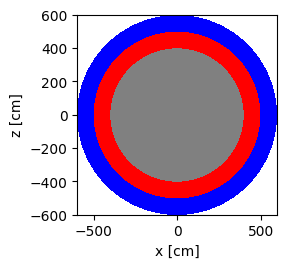

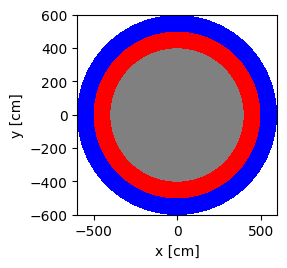

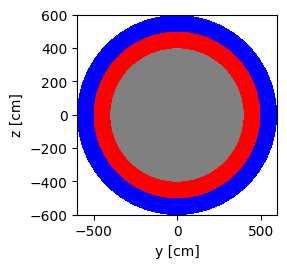

In [10]:
# surfaces
inner_sphere_surface = openmc.Sphere(r=400)
middle_sphere_surface = openmc.Sphere(r=500)
outer_sphere_surface = openmc.Sphere(r=600, boundary_type='vacuum') # note the extra keyword, last surface of the geometry

# regions
blanket_region = +middle_sphere_surface & -outer_sphere_surface
firstwall_region = +inner_sphere_surface & -middle_sphere_surface
inner_vessel_region = -inner_sphere_surface # this is the void region

# cells
blanket_cell = openmc.Cell(region=blanket_region)
firstwall_cell = openmc.Cell(region=firstwall_region)
inner_vessel_cell = openmc.Cell(region=inner_vessel_region) # here as the cell is th new void cell, the other cells will be assigned materials in the next step

geometry = openmc.Geometry([blanket_cell, firstwall_cell, inner_vessel_cell])

color_assignment = {blanket_cell: 'blue', firstwall_cell: 'red', inner_vessel_cell:'grey'}

plot = geometry.plot(basis='xz', colors=color_assignment)
plot.figure.savefig('xz-cell.png')

plot = geometry.plot(basis='xy', colors=color_assignment)
plot.figure.savefig('xy-cell.png')

plot = geometry.plot(basis='yz', colors=color_assignment)
plot.figure.savefig('yz-cell.png')

Assigning materials to cells is also necessary when wanting to use the geometry for particle transport.

Material creation was covered in Task 1 so these are just minimal materials to demonstrate material assignment to cells.

Additionally, this plot uses the color_by='material' argument to colour the plots by materials instead of cells.

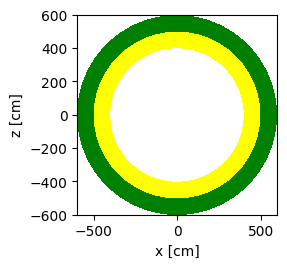

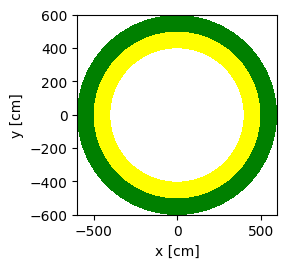

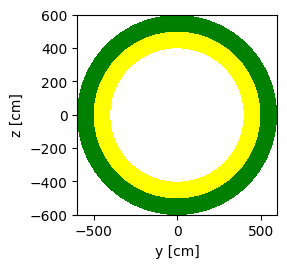

In [11]:
inner_sphere_surface = openmc.Sphere(r=400)
middle_sphere_surface = openmc.Sphere(r=500)
outer_sphere_surface = openmc.Sphere(r=600)

blanket_region = +middle_sphere_surface & -outer_sphere_surface
firstwall_region = +inner_sphere_surface & -middle_sphere_surface
inner_vessel_region = -inner_sphere_surface # this is the void region, it will not have a material

# This makes a minimal material 
lithium_mat = openmc.Material(name='lithium')
lithium_mat.set_density('g/cm3', 2)
lithium_mat.add_element('Li', 1.0)

# This makes another minimal material 
tungsten_mat = openmc.Material(name='tungsten')
tungsten_mat.set_density('g/cm3', 19)
tungsten_mat.add_element('W', 1.0)

blanket_cell = openmc.Cell(region=blanket_region)
blanket_cell.fill = lithium_mat  # this assigns a material to a cell

firstwall_cell = openmc.Cell(region=firstwall_region)
firstwall_cell.fill = tungsten_mat  # this assigns a material to a cell

inner_vessel_cell = openmc.Cell(region=inner_vessel_region)
# note there is no material assignment here as the cell a void cell

geometry = openmc.Geometry([blanket_cell, firstwall_cell, inner_vessel_cell])  

# note the new color scheme is uses material objects as dictionary keys and not not cell objects
color_assignment = {lithium_mat: 'green', tungsten_mat: 'yellow'}

# note the additional argument color_by, normally this defaults to 'cell'

plot = geometry.plot(basis='xz', color_by='material', colors=color_assignment)
plot.figure.savefig('xz-material.png')

plot = geometry.plot(basis='xy', color_by='material',  colors=color_assignment)
plot.figure.savefig('xy-material.png')

plot = geometry.plot(basis='yz', color_by='material',  colors=color_assignment)
plot.figure.savefig('yz-material.png')

Additonal notes.

The geometry.plot method has lots of useful arguments that can be passed in.

Try adding ```outline=True``` to the geometry.plot() method and spot the difference.

# Adding Elements

The center column requires a different surface type. OpenMC has several different surface types in addition to spheres. The documentation contains useful information on all surface types supported: https://openmc.readthedocs.io/en/stable/usersguide/geometry.html#surfaces-and-regions.

For the center column we will use a cylinder with Z axis orientation.

The code block below shows how the center column can be defined.

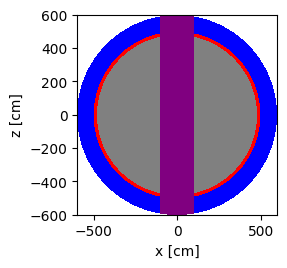

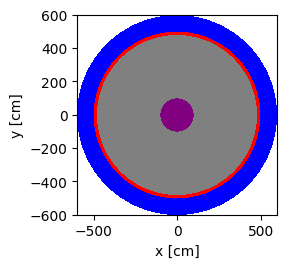

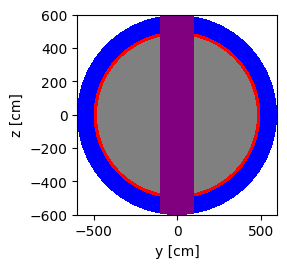

In [12]:
# surfaces
central_column_surface = openmc.ZCylinder(r=100) # note the new surface type
inner_sphere_surface = openmc.Sphere(r=480)
middle_sphere_surface = openmc.Sphere(r=500) 
outer_sphere_surface = openmc.Sphere(r=600, boundary_type='vacuum')

# regions
# the center column region is cut at the top and bottom using the -outer_sphere_surface
central_column_region = -central_column_surface & -outer_sphere_surface
firstwall_region = -middle_sphere_surface & +inner_sphere_surface & +central_column_surface
blanket_region = +middle_sphere_surface & -outer_sphere_surface & +central_column_surface
inner_vessel_region = +central_column_surface & -inner_sphere_surface

# cells
firstwall_cell = openmc.Cell(region=firstwall_region)
central_column_cell = openmc.Cell(region=central_column_region)
blanket_cell = openmc.Cell(region=blanket_region)
inner_vessel_cell = openmc.Cell(region=inner_vessel_region)

geometry = openmc.Geometry([central_column_cell, firstwall_cell, blanket_cell, inner_vessel_cell])

# visualization
color_assignment = {blanket_cell: 'blue', firstwall_cell: 'red',
                    inner_vessel_cell:'grey', central_column_cell:'purple'}

plot = geometry.plot(basis='xz', color_by='cell', colors=color_assignment)
plot.figure.savefig('xz-cell.png')

plot = geometry.plot(basis='xy', color_by='cell',  colors=color_assignment)
plot.figure.savefig('xy-cell.png')

plot = geometry.plot(basis='yz', color_by='cell',  colors=color_assignment)
plot.figure.savefig('yz-cell.png')

Another way to add the center column shape is to use Boolean operators. This is shown in the code block below.

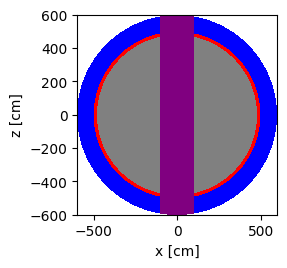

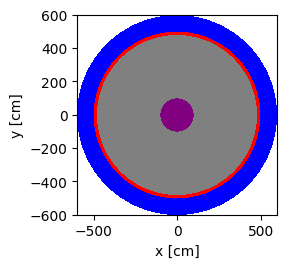

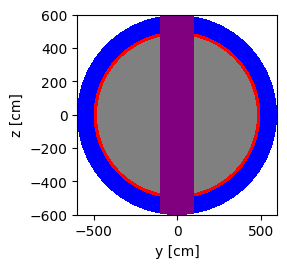

In [ ]:
# surfaces
central_column_surface = openmc.ZCylinder(r=100) # note the new surface type
inner_sphere_surface = openmc.Sphere(r=480)
middle_sphere_surface = openmc.Sphere(r=500) 
outer_sphere_surface = openmc.Sphere(r=600, boundary_type='vacuum')

# regions, this time defined using boolean operators
# There are 3 operators to choose from
#     | OR
#     & AND
#     ~ NOT
# This examples uses the ~ NOT operators

central_column_region = -central_column_surface & -outer_sphere_surface

# the inner_vessel_region is defined using the logical NOT operator ~
inner_vessel_region = -inner_sphere_surface & ~central_column_region

# the firstwall_region is defined as below the middle surface and not in two other regions
firstwall_region = -middle_sphere_surface & ~inner_vessel_region & ~central_column_region

# the blanket_region is defined as between two surfaces and not the center_column_region
blanket_region = +middle_sphere_surface & -outer_sphere_surface & ~central_column_region


# cells defined in the same way
firstwall_cell = openmc.Cell(region=firstwall_region)
central_column_cell = openmc.Cell(region=central_column_region)
blanket_cell = openmc.Cell(region=blanket_region)
inner_vessel_cell = openmc.Cell(region=inner_vessel_region)

geometry = openmc.Geometry([central_column_cell, firstwall_cell, blanket_cell, inner_vessel_cell])

# VISULISATION
color_assignment = {blanket_cell: 'blue', firstwall_cell: 'red',
                    inner_vessel_cell:'grey', central_column_cell:'purple'}

plot = geometry.plot(basis='xz', color_by='cell', colors=color_assignment)
plot.figure.savefig('xz-cell.png')

plot = geometry.plot(basis='xy', color_by='cell',  colors=color_assignment)
plot.figure.savefig('xy-cell.png')

plot = geometry.plot(basis='yz', color_by='cell',  colors=color_assignment)
plot.figure.savefig('yz-cell.png')

# Viewing your Geometry (externally)

It is also possible to create a 3D representation of CSG geometry. The model is converted into a pixelated geometry which can resemble the style of geometry seen in the minecraft computer game.

This is not an actual representation of the CSG geometry but more like a sample of the types of cells with 3D coordinates. CAD geometry is covered later and this gives us a method of seeing the 3D geometry more accurately.

3D pixelated geometry can still be useful for exploring the model; particularly if the resolution is high enough. However, this can be a memory intensive task.

This python notebook allows users to construct CSG geometry and view a 3D representation.

This first code block recreates the simple reactor geometry seen in Part 2, but also assigns materials to each cell.

In [14]:
import openmc

copper = openmc.Material()
copper.set_density('g/cm3', 8.5)
copper.add_element('Cu', 1.0)  # Note, percent_type does not have to be specified as material is 100% copper

iron = openmc.Material()
iron.set_density('g/cm3', 7.75)
iron.add_element('Fe', 1.0, percent_type='wo')

breeder_material = openmc.Material()
breeder_material.set_density('g/cm3', 0.5)
breeder_material.add_element('Li', 1, percent_type='ao')

mats = openmc.Materials([copper, iron, breeder_material])

mats.export_to_xml()

# define all the surfaces
central_sol_surface = openmc.ZCylinder(r=100)
central_shield_outer_surface = openmc.ZCylinder(r=110, boundary_type='vacuum')
vessel_inner = openmc.Sphere(r=500, boundary_type='vacuum')
first_wall_outer_surface = openmc.Sphere(r=510)
breeder_blanket_outer_surface = openmc.Sphere(r=610)


# define the cells
central_sol_region = -central_sol_surface & -breeder_blanket_outer_surface
central_sol_cell = openmc.Cell(region=central_sol_region)
central_sol_cell.fill = copper

central_shield_region = +central_sol_surface & -central_shield_outer_surface & -breeder_blanket_outer_surface
central_shield_cell = openmc.Cell(region=central_shield_region)
central_shield_cell.fill = iron

first_wall_region = -first_wall_outer_surface & +vessel_inner & +central_shield_outer_surface
first_wall_cell = openmc.Cell(region=first_wall_region)
first_wall_cell.fill = iron

breeder_blanket_region = +first_wall_outer_surface & -breeder_blanket_outer_surface & +central_shield_outer_surface
breeder_blanket_cell = openmc.Cell(region=breeder_blanket_region)
breeder_blanket_cell.fill = breeder_material

my_geometry = openmc.Geometry([central_sol_cell,central_shield_cell,first_wall_cell, breeder_blanket_cell])

my_geometry.export_to_xml()

The next code block runs OpenMC in plot mode and produces a vti file.

Particles are not transported through the geometry in plot mode - it simply samples the geometry on the grid and makes a output vti file with the results.

In [ ]:
# makes the 3d "cube" style geometry
vox_plot = openmc.Plot()
vox_plot.type = 'voxel'

# makes sure the bounds of the plot include the whole geometry
vox_plot.width = my_geometry.bounding_box.width

# makes sure the voxel plot is centered at the center of the geometry
vox_plot.origin = my_geometry.bounding_box.center

# sets the pixels in each direction to be proportional to the size of the geometry in that direction
# Your computer RAM will limit the number of pixels you can set in each direction.
# The * 0.1 part of this line reduces the number of pixels in each direction to a reasonable amount but this could be increased if you want more resolution.
vox_plot.pixels = [int(w* 0.1) for w in my_geometry.bounding_box.width]

vox_plot.color_by = 'material'

vox_plot.to_vtk(output='voxel_plot.vti')

'voxel_plot.vti'

IF you are running this in Docker then right mouse click on the vti file in the file explorer to download the vti file onto your base computer and open it with a VTK file reader such as Paraview or Visit.

Paraview can be downloaded here: https://www.paraview.org/download/. Visit can be downloaded here: https://wci.llnl.gov/simulation/computer-codes/visit/downloads.

To view the file in paraview, you will want to do File > Open > select *.vti file 

To properly view the file, you will want to select the "id" and "slice" options the